In [27]:
# Bibliotecas básicas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para análise estatística
from scipy import stats
from scipy.stats import pearsonr

# Bibliotecas para machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Opcional: para visualização da árvore de decisão
from sklearn.tree import plot_tree

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
corr_coeficiente = df['median_income'].corr(df['median_house_value'])
print(f"O coeficiente de correlação: {correlation_coeficiente:.2f}")


O coeficiente de correlação: 0.69


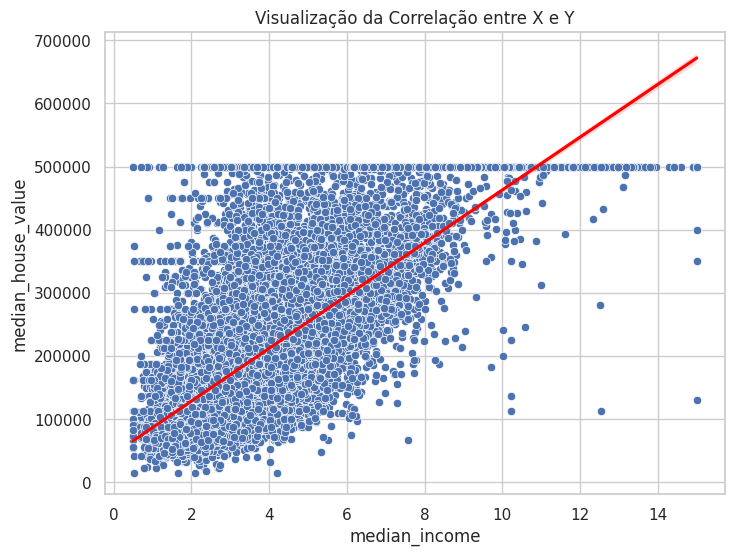

In [39]:


# Usando Seaborn para criar um gráfico de dispersão
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(x='median_income', y='median_house_value', data=df)

# Adicionando uma linha de regressão
regression_plot = sns.regplot(x='median_income', y='median_house_value', data=df, scatter=False, color='red')

# Adicionando título e rótulos
plt.title('Visualização da Correlação entre X e Y')
plt.xlabel('median_income')
plt.ylabel('median_house_value')

# Mostrando o gráfico
plt.show()

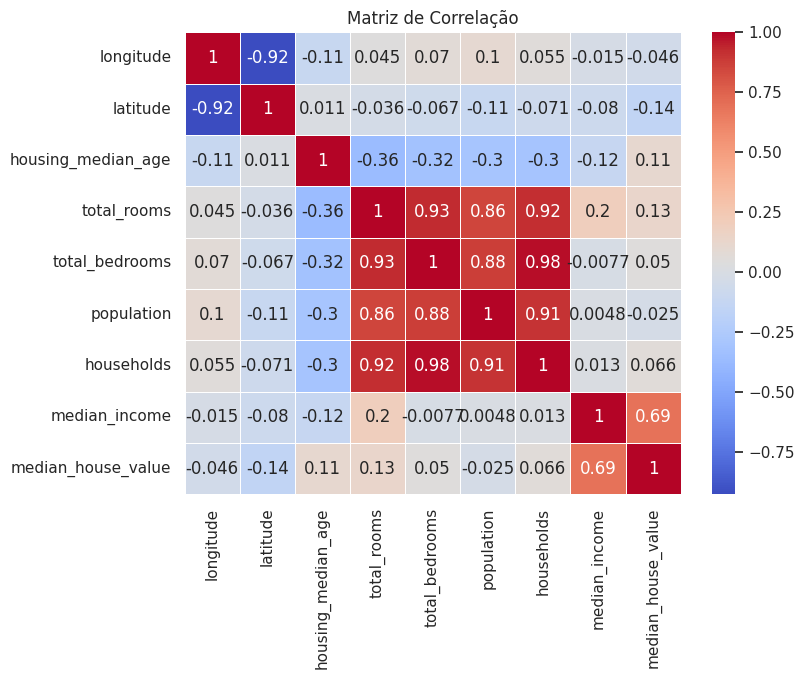

In [45]:
# Criando um mapa de calor
df_cor = df.drop('ocean_proximity', axis=1) 
correlation_matrix = df_cor.corr()


plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Adicionando título
plt.title('Matriz de Correlação')

# Mostrando o gráfico
plt.show()

In [ ]:
# Separar features (X) e target (y)
X = df.drop('median_house_value', axis=1)  # todas as colunas exceto o valor das casas
y = df['median_house_value']  # coluna alvo - valor das casas

# Dividir os dados: 70% treino, 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar as dimensões dos conjuntos resultantes
print(f"Tamanho do conjunto de dados original: {len(df)} amostras")
print(f"Tamanho do conjunto de treino: {len(X_train)} amostras ({len(X_train)/len(df):.1%})")
print(f"Tamanho do conjunto de teste: {len(X_test)} amostras ({len(X_test)/len(df):.1%})")

In [ ]:
# Configurar o estilo
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot para median_income
sns.boxplot(y=df['median_income'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot de Renda Mediana', fontsize=14)
axes[0].set_ylabel('Renda Mediana')
axes[0].tick_params(axis='y', labelsize=10)

# Boxplot para median_house_value
sns.boxplot(y=df['median_house_value'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot de Valor Mediano das Casas', fontsize=14)
axes[1].set_ylabel('Valor Mediano das Casas ($)')
axes[1].tick_params(axis='y', labelsize=10)

# Adicionar estatísticas dos outliers
for i, column in enumerate(['median_income', 'median_house_value']):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Adicionar anotação sobre os outliers
    axes[i].annotate(f'Outliers: {len(outliers)} ({len(outliers)/len(df):.1%})',
                     xy=(0.05, 0.95), xycoords='axes fraction',
                     fontsize=11, bbox=dict(boxstyle='round', fc='white', alpha=0.7))

plt.tight_layout()
plt.show()

In [ ]:
# Função para identificar outliers usando o método IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Identificar outliers em median_income e median_house_value
income_outliers, income_lb, income_ub = identify_outliers(df, 'median_income')
house_value_outliers, house_value_lb, house_value_ub = identify_outliers(df, 'median_house_value')

print(f"Outliers em median_income: {len(income_outliers)} ({len(income_outliers)/len(df):.2%})")
print(f"Outliers em median_house_value: {len(house_value_outliers)} ({len(house_value_outliers)/len(df):.2%})")

# Visualizar os outliers
plt.figure(figsize=(14, 6))

# Scatter plot destacando outliers
plt.subplot(1, 2, 1)
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5, color='blue', label='Dados normais')
plt.scatter(income_outliers['median_income'], income_outliers['median_house_value'], 
            color='red', alpha=0.7, label='Outliers de renda')
plt.scatter(house_value_outliers['median_income'], house_value_outliers['median_house_value'], 
            color='orange', alpha=0.7, label='Outliers de valor')
plt.xlabel('Renda Mediana')
plt.ylabel('Valor Mediano das Casas ($)')
plt.title('Scatter plot com outliers destacados')
plt.legend()

In [ ]:

# Histograma dos valores para detectar skewness
plt.subplot(1, 2, 2)
sns.histplot(df['median_house_value'], kde=True, bins=30)
plt.axvline(house_value_ub, color='r', linestyle='--', label=f'Limite superior: {house_value_ub:.0f}')
plt.title('Distribuição do Valor das Casas')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
 Criar cópias do DataFrame para diferentes estratégias de tratamento
df_original = df.copy()  # mantém todos os dados
df_removed = df[~df.index.isin(house_value_outliers.index)]  # remove outliers
df_capped = df.copy()  # aplica capping nos valores extremos

# Aplicar capping (fixar outliers nos limites)
df_capped['median_income'] = df_capped['median_income'].clip(income_lb, income_ub)
df_capped['median_house_value'] = df_capped['median_house_value'].clip(house_value_lb, house_value_ub)


In [ ]:
# Função para treinar modelo e avaliar
def evaluate_model(X_train, X_test, y_train, y_test, title):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n--- Resultados: {title} ---")
    print(f"MAE: ${mae:.2f}")
    print(f"RMSE: ${rmse:.2f}")
    print(f"R²: {r2:.4f}")
    
    return model, y_pred, mae, rmse, r2


In [ ]:
# Preparar features para cada versão dos dados
feature_columns = ['median_income', 'housing_median_age', 'total_rooms', 
                   'total_bedrooms', 'population', 'households', 'latitude', 'longitude']


In [ ]:

# Dividir dados - Original
X_original = df_original[feature_columns]
y_original = df_original['median_house_value']
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.3, random_state=42
)

# Dividir dados - Outliers removidos
X_removed = df_removed[feature_columns]
y_removed = df_removed['median_house_value']
X_train_rem, X_test_rem, y_train_rem, y_test_rem = train_test_split(
    X_removed, y_removed, test_size=0.3, random_state=42
)

# Dividir dados - Outliers com capping
X_capped = df_capped[feature_columns]
y_capped = df_capped['median_house_value']
X_train_cap, X_test_cap, y_train_cap, y_test_cap = train_test_split(
    X_capped, y_capped, test_size=0.3, random_state=42
)

In [ ]:

# Avaliar os três modelos
model_orig, y_pred_orig, mae_orig, rmse_orig, r2_orig = evaluate_model(
    X_train_orig, X_test_orig, y_train_orig, y_test_orig, "Dados Originais (com outliers)"
)

model_rem, y_pred_rem, mae_rem, rmse_rem, r2_rem = evaluate_model(
    X_train_rem, X_test_rem, y_train_rem, y_test_rem, "Outliers Removidos"
)

model_cap, y_pred_cap, mae_cap, rmse_cap, r2_cap = evaluate_model(
    X_train_cap, X_test_cap, y_train_cap, y_test_cap, "Outliers com Capping"
)

In [ ]:

# 1. Preparação dos conjuntos de dados

# Conjunto completo de variáveis
all_features = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                'population', 'households', 'latitude', 'longitude']

# Conjunto reduzido de variáveis (conforme especificado)
selected_features = ['median_income', 'housing_median_age', 'rooms_per_household']

# Verificar se a variável 'rooms_per_household' já existe, senão criá-la
if 'rooms_per_household' not in df.columns:
    df['rooms_per_household'] = df['total_rooms'] / df['households']

# Separar os dados para os dois modelos
X_all = df[all_features]
X_selected = df[selected_features]
y = df['median_house_value']

# Divisão em treino e teste (70% treino, 30% teste)
X_all_train, X_all_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.3, random_state=42
)
X_sel_train, X_sel_test, _, _ = train_test_split(
    X_selected, y, test_size=0.3, random_state=42  # Usando a mesma seed para garantir compatibilidade
)

# 2. Treinamento dos modelos

# Modelo com todas as variáveis (baseline)
model_all = LinearRegression()
model_all.fit(X_all_train, y_train)

# Modelo com variáveis selecionadas
model_selected = LinearRegression()
model_selected.fit(X_sel_train, y_train)

# 3. Avaliação dos modelos

# Previsões
y_pred_all = model_all.predict(X_all_test)
y_pred_sel = model_selected.predict(X_sel_test)

# Métricas de desempenho
metrics = pd.DataFrame(index=['Todas variáveis', 'Variáveis selecionadas'])

# Calcular MAE
metrics['MAE'] = [
    mean_absolute_error(y_test, y_pred_all),
    mean_absolute_error(y_test, y_pred_sel)
]

# Calcular RMSE
metrics['RMSE'] = [
    np.sqrt(mean_squared_error(y_test, y_pred_all)),
    np.sqrt(mean_squared_error(y_test, y_pred_sel))
]

# Calcular R²
metrics['R²'] = [
    r2_score(y_test, y_pred_all),
    r2_score(y_test, y_pred_sel)
]

# Mostrar métricas formatadas
print("Comparação do desempenho dos modelos:")
print(metrics.round(2))

# 4. Visualizações e comparações

# Configurar estilo para visualização
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Barras para comparação de métricas
metrics_long = metrics.reset_index().melt(id_vars='index', var_name='Métrica', value_name='Valor')

# MAE (menor é melhor)
sns.barplot(x='index', y='Valor', data=metrics_long[metrics_long['Métrica']=='MAE'], 
            ax=axes[0], palette='Blues_r')
axes[0].set_title('Erro Médio Absoluto (MAE)\nMenor é melhor', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('MAE ($)')

# RMSE (menor é melhor)
sns.barplot(x='index', y='Valor', data=metrics_long[metrics_long['Métrica']=='RMSE'], 
            ax=axes[1], palette='Blues_r')
axes[1].set_title('Raiz do Erro Quadrático Médio (RMSE)\nMenor é melhor', fontsize=14)
axes[1].set_xlabel('')
axes[1].set_ylabel('RMSE ($)')

# R² (maior é melhor)
sns.barplot(x='index', y='Valor', data=metrics_long[metrics_long['Métrica']=='R²'], 
            ax=axes[2], palette='Blues')
axes[2].set_title('Coeficiente de Determinação (R²)\nMaior é melhor', fontsize=14)
axes[2].set_xlabel('')
axes[2].set_ylabel('R²')

plt.tight_layout()
plt.show()

# 5. Visualização das previsões vs valores reais

plt.figure(figsize=(14, 6))

# Gráfico para o modelo com todas as variáveis
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_all, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais ($)')
plt.ylabel('Previsões ($)')
plt.title(f'Modelo com Todas Variáveis\nR² = {r2_score(y_test, y_pred_all):.2f}')

# Gráfico para o modelo com variáveis selecionadas
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sel, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais ($)')
plt.ylabel('Previsões ($)')
plt.title(f'Modelo com Variáveis Selecionadas\nR² = {r2_score(y_test, y_pred_sel):.2f}')

plt.tight_layout()
plt.show()

# 6. Importância das variáveis no modelo completo
importances = pd.DataFrame({
    'Variável': all_features,
    'Coeficiente': model_all.coef_
})
importances['Importância Absoluta'] = abs(importances['Coeficiente'])
importances = importances.sort_values('Importância Absoluta', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importância Absoluta', y='Variável', data=importances, palette='viridis')
plt.title('Importância das Variáveis no Modelo Completo', fontsize=14)
plt.xlabel('Importância Absoluta (|Coeficiente|)')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree

# Assumindo que 'df' já contém os dados e as variáveis necessárias

# 1. Preparar os dados
features = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
           'population', 'households', 'latitude', 'longitude']
X = df[features]
y = df['median_house_value']

# Dividir em conjuntos de treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Treinar os modelos
# Árvore de Decisão
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
tree_model.fit(X_train, y_train)

# Regressão Linear 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 3. Fazer previsões
y_pred_tree = tree_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)

# 4. Calcular métricas
metrics = pd.DataFrame(index=['Regressão Linear', 'Árvore de Decisão'])

# MAE (Mean Absolute Error)
metrics['MAE'] = [
    mean_absolute_error(y_test, y_pred_linear),
    mean_absolute_error(y_test, y_pred_tree)
]

# RMSE (Root Mean Squared Error)
metrics['RMSE'] = [
    np.sqrt(mean_squared_error(y_test, y_pred_linear)),
    np.sqrt(mean_squared_error(y_test, y_pred_tree))
]

# R² (Coefficient of Determination)
metrics['R²'] = [
    r2_score(y_test, y_pred_linear),
    r2_score(y_test, y_pred_tree)
]

# Exibir as métricas formatadas
print("Comparação das métricas de desempenho:")
print(metrics.round(2))

# 5. Visualizações comparativas

# Configuração do estilo para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')

# 5.1 Comparação de métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Criar DataFrame de métricas para o seaborn
metrics_long = metrics.reset_index().melt(id_vars='index', var_name='Métrica', value_name='Valor')

# Gráfico de MAE
sns.barplot(x='index', y='Valor', data=metrics_long[metrics_long['Métrica']=='MAE'], 
            ax=axes[0], palette=['skyblue', 'lightgreen'])
axes[0].set_title('Erro Médio Absoluto (MAE)\nMenor é melhor', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('MAE ($)')

# Gráfico de RMSE
sns.barplot(x='index', y='Valor', data=metrics_long[metrics_long['Métrica']=='RMSE'], 
            ax=axes[1], palette=['skyblue', 'lightgreen'])
axes[1].set_title('Raiz do Erro Quadrático Médio (RMSE)\nMenor é melhor', fontsize=14)
axes[1].set_xlabel('')
axes[1].set_ylabel('RMSE ($)')

# Gráfico de R²
sns.barplot(x='index', y='Valor', data=metrics_long[metrics_long['Métrica']=='R²'], 
            ax=axes[2], palette=['skyblue', 'lightgreen'])
axes[2].set_title('Coeficiente de Determinação (R²)\nMaior é melhor', fontsize=14)
axes[2].set_xlabel('')
axes[2].set_ylabel('R²')

plt.tight_layout()
plt.show()

# 5.2 Comparação de previsões vs valores reais
plt.figure(figsize=(14, 6))

# Gráfico para Regressão Linear
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais ($)')
plt.ylabel('Previsões ($)')
plt.title(f'Regressão Linear\nMAE: ${metrics.loc["Regressão Linear", "MAE"]:.2f}')

# Gráfico para Árvore de Decisão
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais ($)')
plt.ylabel('Previsões ($)')
plt.title(f'Árvore de Decisão\nMAE: ${metrics.loc["Árvore de Decisão", "MAE"]:.2f}')

plt.tight_layout()
plt.show()

# 5.3 Histograma dos erros
plt.figure(figsize=(14, 6))

# Calcular os erros
error_linear = y_test - y_pred_linear
error_tree = y_test - y_pred_tree

# Histograma dos erros para Regressão Linear
plt.subplot(1, 2, 1)
sns.histplot(error_linear, kde=True, bins=30, color='blue')
plt.axvline(0, color='r', linestyle='--')
plt.title('Distribuição dos Erros - Regressão Linear')
plt.xlabel('Erro ($)')

# Histograma dos erros para Árvore de Decisão
plt.subplot(1, 2, 2)
sns.histplot(error_tree, kde=True, bins=30, color='green')
plt.axvline(0, color='r', linestyle='--')
plt.title('Distribuição dos Erros - Árvore de Decisão')
plt.xlabel('Erro ($)')

plt.tight_layout()
plt.show()

# 6. Visualizar a árvore de decisão (versão simplificada)
plt.figure(figsize=(15, 10))
plot_tree(tree_model, max_depth=3, feature_names=features, 
          filled=True, rounded=True, fontsize=10)
plt.title('Primeiros 3 Níveis da Árvore de Decisão', fontsize=16)
plt.tight_layout()
plt.show()

# 7. Análise de relações não lineares

# Selecionar uma feature para análise detalhada (ex: median_income)
feature_to_analyze = 'median_income'

plt.figure(figsize=(14, 6))

# Gráfico para Regressão Linear
plt.subplot(1, 2, 1)
plt.scatter(X_test[feature_to_analyze], y_test, alpha=0.5, label='Dados Reais')
plt.scatter(X_test[feature_to_analyze], y_pred_linear, alpha=0.5, color='red', label='Previsões')
plt.xlabel(feature_to_analyze)
plt.ylabel('median_house_value ($)')
plt.title('Regressão Linear')
plt.legend()

# Gráfico para Árvore de Decisão
plt.subplot(1, 2, 2)
plt.scatter(X_test[feature_to_analyze], y_test, alpha=0.5, label='Dados Reais')
plt.scatter(X_test[feature_to_analyze], y_pred_tree, alpha=0.5, color='red', label='Previsões')
plt.xlabel(feature_to_analyze)
plt.ylabel('median_house_value ($)')
plt.title('Árvore de Decisão')
plt.legend()

plt.tight_layout()
plt.show()

# 8. Importância das características na árvore de decisão
importances = pd.DataFrame({
    'Variável': features,
    'Importância': tree_model.feature_importances_
})
importances = importances.sort_values('Importância', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Variável', data=importances, palette='viridis')
plt.title('Importância das Variáveis na Árvore de Decisão', fontsize=14)
plt.tight_layout()
plt.show()